Observation #1: There is much more land mass (and subsequently more cities) in the northern hemisphere compared to the southern and thus clusters data points on the right hand side of the plots.  

Obervation #2: Cloudiness/Wind Speed/Humidity don't seem to be affected by the distance from the equator. A larger and evenly dispersed dataset may return different conclusions though.

Obervation #3: Temperature seems to be the only clear trend in the plots that were done but was a little surprising to see less of a drop in temp as cities go south vs. north. I suppose this has something to do with less land mass and more cities that are located near oceans which would moderate temps.

In [1]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import openweathermapy.core as ow
from citipy import citipy
import json
import datetime as dt


In [2]:
file_name = "../twitter bot module/api_keys.json"
data = json.load(open(file_name))
wkey = data['openweathermapy_api_key']
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [3]:
cities_csv = "../twitter bot module/worldcities.csv"
cities_df = pd.read_csv(cities_csv)
cities_df.head()


,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [4]:
selected_cities = cities_df.sample(n=500, random_state=1)

In [5]:
selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""
#selected_cities = selected_cities.reset_index()
decimals = pd.Series([2,2],index=['Latitude', 'Longitude'])
selected_cities = selected_cities.round(decimals)

row_count = 0


In [6]:
for index, row in selected_cities.iterrows():
    target_url = url +"appid=" + wkey + "&lat=" + str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&units=" + units
    
    row_count += 1
    
    city_wx_data = requests.get(target_url).json()
    print("City Name: " + city_wx_data["name"] + ", Count:" + str(row_count) )
    print(target_url)
    
    try: 
        
        city_temp = city_wx_data["main"]["temp"]
        city_humid = city_wx_data["main"]["humidity"]
        city_clouds = city_wx_data["clouds"]["all"]
        city_wind = city_wx_data["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", city_temp)
        selected_cities.set_value(index, "Humidity", city_humid)
        selected_cities.set_value(index, "Cloudiness", city_clouds)
        selected_cities.set_value(index, "Wind Speed", city_wind)
        
    except:
        print("Error with city data. Skipping")
        continue
        
selected_cities.to_csv("City_Weather.csv", sep=',', encoding='utf-8')
selected_cities.head()

City Name: Saint-Felicien, Count:1
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=48.65&lon=-72.45&units=imperial


C:\Users\Jeff\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Jeff\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Jeff\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Jeff\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


City Name: São Félix, Count:2
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=-12.6&lon=-38.97&units=imperial
City Name: Tagbubungang Diot, Count:3
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=11.13&lon=124.4&units=imperial
City Name: El Plan, Count:4
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=15.28&lon=-87.97&units=imperial
City Name: Lydenburg, Count:5
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=-25.1&lon=30.46&units=imperial
City Name: Schwandorf in Bayern, Count:6
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=49.33&lon=12.11&units=imperial
City Name: Tarashcha, Count:7
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=49.69&lon=30.47&units=imperial
City Name: Poiana Lacului, Count:8
http://api.openweathermap.org/data/2.5/w

City Name: Kiskunmajsa, Count:56
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=46.49&lon=19.74&units=imperial
City Name: Islaz, Count:57
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=43.73&lon=24.75&units=imperial
City Name: Rhenen, Count:58
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=51.96&lon=5.57&units=imperial
City Name: Harlau, Count:59
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=47.43&lon=26.9&units=imperial
City Name: Weverstraat, Count:60
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=51.0&lon=4.13&units=imperial
City Name: Mitake, Count:61
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=35.4&lon=137.06&units=imperial
City Name: Kollam, Count:62
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6

City Name: Victor Harbor, Count:110
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=-35.55&lon=138.62&units=imperial
City Name: Youghal, Count:111
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=51.95&lon=-7.85&units=imperial
City Name: Itau de Minas, Count:112
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=-20.72&lon=-46.75&units=imperial
City Name: San Juan Nepomuceno, Count:113
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=9.95&lon=-75.08&units=imperial
City Name: Buray, Count:114
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=10.72&lon=122.46&units=imperial
City Name: Obshtina Elin Pelin, Count:115
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=42.67&lon=23.6&units=imperial
City Name: Sumalig, Count:116
http://api.openweathermap.

City Name: Pirapo, Count:164
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=-26.85&lon=-55.53&units=imperial
City Name: Montecchio Maggiore, Count:165
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=45.5&lon=11.4&units=imperial
City Name: Nizhniy Bestyakh, Count:166
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=61.96&lon=129.91&units=imperial
City Name: Paluan, Count:167
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=13.42&lon=120.46&units=imperial
City Name: San Juan de Dios, Count:168
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=9.88&lon=-84.08&units=imperial
City Name: Poblacion, San Felipe, Count:169
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=15.06&lon=120.07&units=imperial
City Name: Gaspar, Count:170
http://api.openweath

City Name: Arco, Count:218
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=45.92&lon=10.88&units=imperial
City Name: Mil’kovo, Count:219
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=54.72&lon=158.62&units=imperial
City Name: Santoshpur, Count:220
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=22.53&lon=88.26&units=imperial
City Name: Dolhasca, Count:221
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=47.43&lon=26.6&units=imperial
City Name: Nospelt, Count:222
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=49.68&lon=6.01&units=imperial
City Name: Watsonville, Count:223
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=36.91&lon=-121.76&units=imperial
City Name: Karyotissa, Count:224
http://api.openweathermap.org/data/2.5/weather?appid=1

City Name: Kibangay, Count:272
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=8.05&lon=124.89&units=imperial
City Name: Monticello, Count:273
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=45.31&lon=-93.79&units=imperial
City Name: Madrid, Count:274
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=4.73&lon=-74.26&units=imperial
City Name: Ural’skiy, Count:275
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=57.9&lon=55.48&units=imperial
City Name: El Rancho, Count:276
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=14.68&lon=-87.5&units=imperial
City Name: Soskut, Count:277
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=47.41&lon=18.82&units=imperial
City Name: Akouda, Count:278
http://api.openweathermap.org/data/2.5/weather?appid=10c4f6

City Name: L’Agha, Count:327
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=36.76&lon=3.05&units=imperial
City Name: Dedovichi, Count:328
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=57.55&lon=29.95&units=imperial
City Name: Marion, Count:329
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=40.59&lon=-83.13&units=imperial
City Name: Rosiesti, Count:330
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=46.43&lon=27.88&units=imperial
City Name: Vrutky, Count:331
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=49.12&lon=18.92&units=imperial
City Name: Botoroaga, Count:332
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=44.15&lon=25.54&units=imperial
City Name: Ufimskiy, Count:333
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684

City Name: Orange Cove, Count:381
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=36.62&lon=-119.31&units=imperial
City Name: Stefanavikion, Count:382
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=39.47&lon=22.73&units=imperial
City Name: Oberkirch, Count:383
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=48.53&lon=8.08&units=imperial
City Name: Vysoke Myto, Count:384
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=49.95&lon=16.15&units=imperial
City Name: Huayucachi, Count:385
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=-12.13&lon=-75.23&units=imperial
City Name: White Center, Count:386
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=47.52&lon=-122.35&units=imperial
City Name: Ibiracu, Count:387
http://api.openweathermap.org/data/

City Name: Delfzijl, Count:435
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=53.33&lon=6.92&units=imperial
City Name: Kemnay, Count:436
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=57.23&lon=-2.45&units=imperial
City Name: Teonthar, Count:437
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=24.98&lon=81.65&units=imperial
City Name: Windsor, Count:438
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=38.55&lon=-122.82&units=imperial
City Name: Capelle aan den IJssel, Count:439
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=51.93&lon=4.58&units=imperial
City Name: Puracic, Count:440
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=44.55&lon=18.48&units=imperial
City Name: Talen, Count:441
http://api.openweathermap.org/data/2.5/weather?app

City Name: Figueiredo, Count:490
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=40.84&lon=-8.48&units=imperial
City Name: Himaya, Count:491
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=10.45&lon=122.83&units=imperial
City Name: Hermanus, Count:492
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=-34.42&lon=19.23&units=imperial
City Name: Chilchota, Count:493
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=19.85&lon=-102.13&units=imperial
City Name: San Juan de Arama, Count:494
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=3.35&lon=-73.89&units=imperial
City Name: Cardonal, Count:495
http://api.openweathermap.org/data/2.5/weather?appid=10c4f684ad8218433ee6f20b577f106c&lat=20.62&lon=-99.12&units=imperial
City Name: Belaya Glina, Count:496
http://api.openweathermap.org/data/2.5

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
4943,ca,saint-felicien,48.65,-72.45,-11.21,76,5,4.27
2566,br,cachoeira,-12.60,-38.97,77.38,80,44,5.95
30331,ph,tagbubunga,11.13,124.40,81.2,97,8,9.42
15071,hn,pimienta,15.28,-87.97,75.2,100,20,9.17
46631,za,lydenburg,-25.10,30.46,59.33,100,64,1.81


In [7]:
date_today = dt.datetime.today().strftime("%m/%d/%Y")

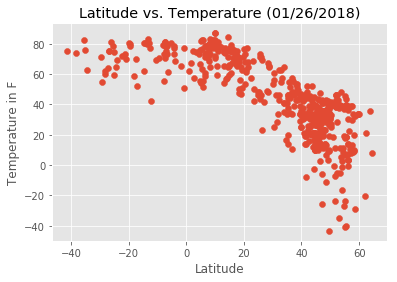

In [8]:
with plt.style.context("ggplot"):
    plt.scatter(selected_cities["Latitude"], selected_cities["Temperature"])
    plt.title("Latitude vs. Temperature" + " (" + date_today + ")"  )
    plt.ylabel("Temperature in F")
    plt.xlabel("Latitude")
    plt.savefig("Lat_vs_Temp.png")

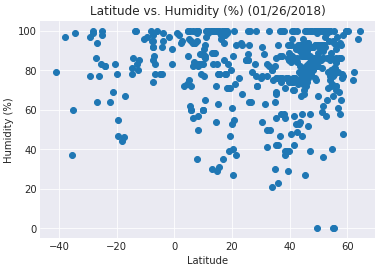

In [9]:
with plt.style.context("seaborn-darkgrid"):
    plt.scatter(selected_cities["Latitude"], selected_cities["Humidity"])
    plt.title("Latitude vs. Humidity (%)" + " (" + date_today + ")")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.savefig("Lat_vs_Humidity.png")

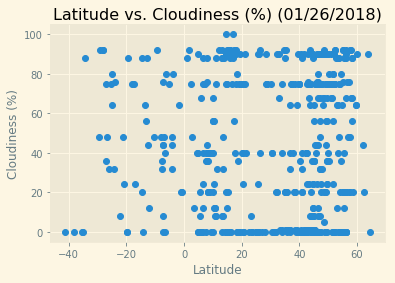

In [10]:
with plt.style.context("Solarize_Light2"):
    plt.scatter(selected_cities["Latitude"], selected_cities["Cloudiness"])
    plt.title("Latitude vs. Cloudiness (%)" + " (" + date_today + ")")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.savefig("Lat_vs_Clouds.png")

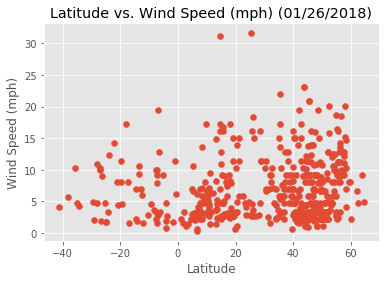

In [11]:
with plt.style.context("ggplot"):
    plt.scatter(selected_cities["Latitude"], selected_cities["Wind Speed"])
    plt.title("Latitude vs. Wind Speed (mph)" + " (" + date_today + ")")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")
    plt.savefig("Lat_vs_Wind.png")